# Random Forest

In this practical task, you will solve a regression problem on real-world data using a linear model and a random forest. 

## Purposes

	•	Perform data preprocessing.
	•	Train a linear regression model on the dataset.
	•	Train a random forest model on the dataset.
	•	Tune the hyperparameters for the random forest.
	•	Visualize the feature importance of the random forest.

## What is included in the practical work

There are many features in the dataset, but in this work, we will focus only on the numerical features:
* year — year of manufacture of the car;
* km_driven — mileage;
* seats — number of seats;
* mileage — another characteristic of mileage;
* engine — engine power;
* max_power — car power.

The target variable is selling_price.

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

In [18]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


I created objects X_train, y_train, X_test, and y_test. I will store in them the matrices “object — feature” and the target variable vectors for the training and test datasets.
In the training data, there are cars for which the price is unknown. I will remove these cars from the training set.

In [22]:
train = train.dropna(subset = ['selling_price'])

In [24]:
X_train = train.drop(columns=['selling_price', 'name','fuel','seller_type','owner','torque','transmission'], axis=1)
y_train = train['selling_price']
X_test = test.drop(columns = ['selling_price', 'name','fuel','seller_type','owner','torque','transmission'] , axis = 1)
y_test = test['selling_price']

Before training the models, I will preprocess the data.
The columns mileage, engine, and max_power are numerical by nature. To convert them into numerical columns, I will remove the units of measurement and keep only the numbers

In [27]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats
0,2014.0,145500.0,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014.0,120000.0,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2010.0,127000.0,23.0 kmpl,1396 CC,90 bhp,5.0
4,2017.0,45000.0,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,2001.0,5000.0,16.1 kmpl,796 CC,37 bhp,4.0


In [29]:
replacement_mileage = {' kmpl':'',' km/kg':''}
X_train['mileage'] = X_train['mileage'].replace(replacement_mileage, regex = True).astype(float)
X_test['mileage'] = X_test['mileage'].replace(replacement_mileage, regex = True).astype(float)

replacement_engine = {' CC':''}
X_train['engine'] = X_train['engine'].replace(replacement_engine, regex = True).astype(float)
X_test['engine'] = X_test['engine'].replace(replacement_engine, regex = True).astype(float)

replacement_power = {' bhp':''}
X_train['max_power'] = X_train['max_power'].replace(replacement_power, regex = True).astype(float)
X_test['max_power'] = X_test['max_power'].replace(replacement_power, regex = True).astype(float)

Keep only the six numerical columns in the dataset:

year, km_driven, seats, engine, mileage, max_power

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1000 non-null   int64  
 1   km_driven  1000 non-null   int64  
 2   mileage    981 non-null    float64
 3   engine     981 non-null    float64
 4   max_power  981 non-null    float64
 5   seats      981 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6997
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       6699 non-null   float64
 1   km_driven  6699 non-null   float64
 2   mileage    6497 non-null   float64
 3   engine     6497 non-null   float64
 4   max_power  6503 non-null   float64
 5   seats      6497 non-null   float64
dtypes: float64(6)
memory usage: 366.4 KB


Now, let’s fill the missing values as follows:
* Compute the mean values for the columns in the training dataset.
* Fill the missing values in both the training and test datasets with the computed mean values.

In [37]:
mean_mil = X_train['mileage'].mean()
X_train['mileage'] = X_train['mileage'].fillna(mean_mil)
X_test['mileage'] = X_test['mileage'].fillna(mean_mil)

mean_engine = X_train['engine'].mean()
X_train['engine'] = X_train['engine'].fillna(mean_engine)
X_test['engine'] = X_test['engine'].fillna(mean_engine)

mean_max_power = X_train['max_power'].mean()
X_train['max_power'] = X_train['max_power'].fillna(mean_max_power)
X_test['max_power'] = X_test['max_power'].fillna(mean_max_power)

freq_seats = X_train['seats'].mode()[0]
X_train['seats'] = X_train['seats'].fillna(freq_seats)
X_test['seats'] = X_test['seats'].fillna(freq_seats)

To train the models and make predictions, follow these steps:
* Train a Linear Regression model on the processed training data.
* Train a Random Forest model with default parameters.
* Make predictions using the trained models on the test data.
* Compute the R² score (coefficient of determination) to evaluate the model performance.

In [40]:
lin_reg = LinearRegression()
rfg = RandomForestRegressor() 

lin_reg.fit(X_train, y_train)
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
pred_lin_reg = lin_reg.predict(X_test)
pred_rfg  = rfg.predict(X_test)
print(f'RandomForest: {r2_score(y_test, pred_rfg)}\nLinearReg: {r2_score(y_test, pred_lin_reg)}')

RandomForest: 0.9630417479579112
LinearReg: 0.6481957240589242


The best model is Random Forest.

Improve the prediction quality of the Random Forest by hyperparameter tuning.

In [46]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
params = {
    'n_estimators':np.arange(1,100,50),
    'max_depth': np.arange(1,20,2),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':np.arange(1,10,2),
    'min_samples_split':np.arange(1,10,2)
}

grid = GridSearchCV(rfg, params, cv = 3, scoring='r2')
grid.fit( X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
900 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([1, 3, 5, 7, 9]),
                         'n_estimators': array([ 1, 51])},
             scoring='r2')

In [47]:
grid.best_params_

{'max_depth': 13,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 51}

In [48]:
rgf = RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf =3, min_samples_split=7, n_estimators = 51)
rfg.fit(X_train, y_train)
pred_rfg = rfg.predict(X_test)
r2_score(y_test, pred_rfg)

0.9642586402154183

The model is ready. Now, I will interpret it.

Using the model.feature_importances_ method, I will visualize the feature importance histogram for the Random Forest with tuned hyperparameters.

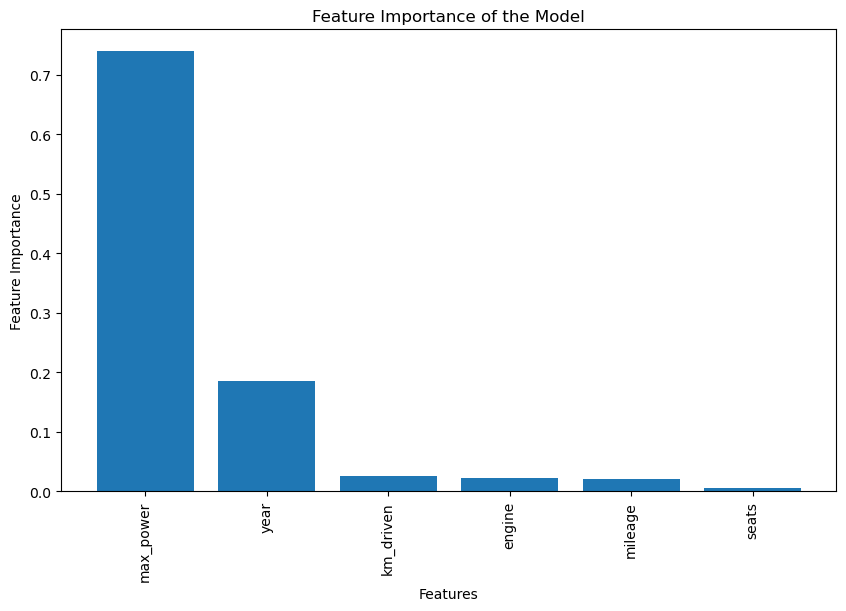

In [53]:
import matplotlib.pyplot as plt

feature_importances = rfg.feature_importances_
feature_name = X_train.columns
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_name[i] for i in indices]
sorted_importances = feature_importances[indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance of the Model")
plt.show()